# Welcome to Sage

In a Jupyter notebook, you can type commands and when you type shift-enter, the kernel (sage) will respond.

Type 2+2 (or another favourite basic arithmetic problem) in the following "cell" and then shift-enter.

In [7]:
2+2

4

The first thing we need to make this more useful is memory, i.e. variables.  Keep in mind that the order you interact with the kernel is what matters for working memory (the order you run cells, which is shown as a number in light grey left of the cell), not the order the cells appear in the notebook.  If you ever need to start over, there's a "reload circle" icon above, which restarts the kernel (wiping working memory).

Here's an example of assigning a quantity to a variable (a single ``=`` sign).  This has several commands in a row.  Before you evaluate, what do you expect the answer to be?

In [19]:
n = 5
m = 3
233^2

54289

One other really important thing to know is how to look up commands as needed.  There are various ways to discover or learn about a command:

1. Start typing what you think it is called and then hit ``tab`` which will show tab-completion suggestions.
2. If you think you have the command name and want to know what it does, type the name followed by a ``?`` and shift-enter will show the documentation.  (To get rid of the docs, just use the cell for something else and run it.)
3. Google "sagemath <function/name/command/concept>" and you may find the command you want.
4. Sometimes, what you want is actually just a programming language thing, so googling "python <function/name/command/concept>" will be useful.
5. ChatGPT may answer your questions.  It will still typically hallucinate commands when Sage is lacking functionality, so take your GPT with a grain of salt, as usual.
6. Look in the Sage Reference Manual.  [https://doc.sagemath.org/html/en/reference/index.html](https://doc.sagemath.org/html/en/reference/index.html)

In the next three cells, try all of these methods.  Figure out how to compute $sin(2\pi/3)$, $\sqrt{54289}$ and the elliptic curve with defining equation $y^2 = x^3 + 2$ over the rational numbers.

In [17]:
sin(2*pi/3)

1/2*sqrt(3)

In [20]:
sqrt(54289)

233

In [25]:
EllipticCurve([0,0,0,0,2])

Elliptic Curve defined by y^2 = x^3 + 2 over Rational Field

Finally, if you ever need more cells in the notebook, you can click the icons on the right of a code cell (or uncompiled markdown cell) to create new ones, copy or delete a cell, or move it up or down relative to what you have already.  Try that out now.

# Case Study 1:  Quadratic Residues

## Modular Arithmetic 

We will begin with modular arithmetic.  Here's how we can compute some stuff in the ring $\mathbb{Z}/m\mathbb{Z}$.

Note:  the instructions you are reading in this cell are in markdown.  Double-click this text to see what the markdown looks like before it is compiled.  It reads latex.  Shift-enter to recompile the markdown.  Each cell is either markdown or code (change this with the drop down menu above).

For the next cell, figure out what you think it does, then type shift-enter to make it run.

Notice that ``#`` declares a comment (notes to self that the kernel ignores).

In [1]:
m = 53; R = IntegerModRing(m) # you can use a semicolon or a carriage return between commands
R(17)^2 # this notation R(17) tells Sage that it should think of 17 as an element of R

24

Compute the inverse of 3 modulo 7 (you can use exponent -1 notation).  You should get 5.

In [2]:
R = IntegerModRing(7); R(3)^(-1)

5

There's also a super quick mod command when you don't want to create the ring as a sage object; this is ``mod(a,b)`` or ``Mod(a,b)``.  Try it.  It just returns an integer (smallest non-negative residue), not an element of an IntegerModRing.  Types are important in Sage!

In [4]:
Mod(7,5)

2

Run the following cell.  Why does it fail?  Clue: order of operations.

In [5]:
mod(2^1700000000000000000000000000000000000000000000000000000000000000000000000000000000,10)

OverflowError: exponent must be at most 9223372036854775807

In the next cell, fix the syntax in the cell above so it will run and return the correct answer, which is 6.

In [6]:
mod(2,10)^1700000000000000000000000000000000000000000000000000000000000000000000000000000000

6

## Visualizing Modular Arithmetic

Let's get visual.  Let's fix a modulus for now (we'll reset $m$ and $R$ in case you changed them).  To visualize modular arithmetic, one approach is a clock face.  We can create a graphics object and add things on to it.

In [36]:
m = 53
R = IntegerModRing(m)
clock = Graphics() # make an empty graphics object
# the command '+=' says add the thing on the right to the existing thing on the left
clock += circle( (0,0), 1, color="red" ) # center, radius, color 

To see the clock at any time we are working on it, you can use ``show()``.  Turn the axes on and off.  Try ``frame=True``.  Try setting the field of view to see only the lower left quadrant, using ``xmin =`` and its cousins ``xmax, ymin, ymax``.  Make the image bigger or smaller with ``figsize``.  The arguments of ``show()`` are separated by commas.

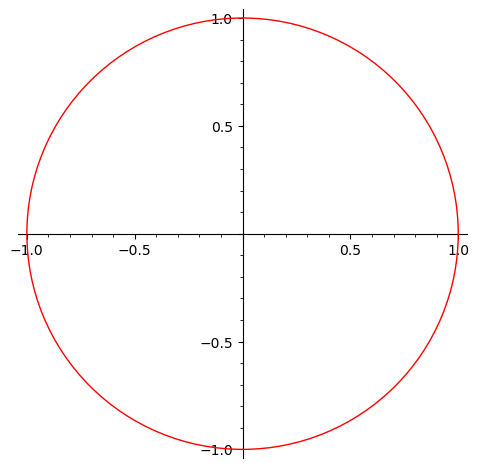

In [37]:
clock.show(axes=True, frame=False)

Now define a function that returns the x,y coordinates of the k-th notch on the clock of radius r centred at the origin.  Please start your clock from zero at the top and increase clockwise (those who choose a different normalization shall be given twenty lashes).

In [38]:
# here's a skeleton function definition
# function name is notch (don't change this, so we can refer to it later)
# inputs are variables k and r
def notch(k, r):  
    # k is notch
    # r is radius
    # maybe run commands here that depend on inputs k and r
    x = r*sin(k*2*pi/m) # fill this in
    y = r*cos(k*2*pi/m) # fill this in
    return (x,y)  # 'return' declares the output of the function

Now test your function, it should return ``(0,1)`` on input ``(0,1)`` and ``(sin(2/53*pi), cos(2/53*pi))`` on input ``(1, 1)``

In [39]:
notch(0,1)

(0, 1)

Now we want to place dots around your clock face and label them with numbers.  Because you want to place a lot of notches, you'll want to use one of the most useful programming constructions in python:  a ``for`` loop.  So before we handle the clock I want to give you an example.  Before you run this cell, guess what the output will be.  Take careful account of exactly how many times it runs and what the varaible values are as it runs.

In [40]:
count = 0
for i in srange(5): # srange outputs integers one at a time
    count += 1 # python cares about indentation, whatever is indented is inside the for loop
    print("The value of i is:", i) # Welcome to the python print statement, another trusty friend!
print( "I'm done!" ) # no longer indented!
print( "My final count is: ", count)

The value of i is: 0
The value of i is: 1
The value of i is: 2
The value of i is: 3
The value of i is: 4
I'm done!
My final count is:  5


Ok, now place dots around your clock face and label them with numbers.  You already have a graphics object ``clock`` which we want to add to.  You'll need the graphics objects ``point`` and ``text``.  You'll probably want to place your labels slightly outside the notches so they don't overlap the actual clock circle.  Display the result.

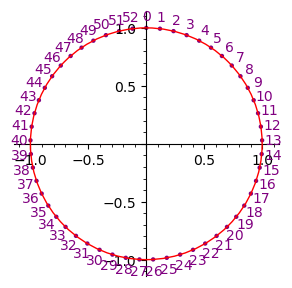

In [41]:
for k in range(m):
    clock += point( notch(k, 1), color="purple")
    clock += text( k, notch(k, 1.1), color="purple")
clock.show(figsize=4)

Now draw a line segment from each $x$ modulo $m$ to $a*x$ modulo $m$, where $a=2$.  This is a visual representation of multiplication by two.  

In [42]:
a = 2
for k in range(m):
    clock += line( [notch(k,1), notch(a*k,1)], color="purple")

Make your picture as pretty as you like, maybe try different $a$ or $m$ (notice you have one graphics object called clock and you can't subtract from it, so you may need to reinitialize if you are changing $a$ or $m$ etc, otherwise you'll get a union of all the things you've drawn so far).  Then you can export it to an image file to decorate your door.  To do this, you simply replace the ``show(...`` command with ``save( "myname.pdf", ...``.  You can also save to png.  PDF is vector graphics, which means the quality is adaptive, whereas PNG is pixel graphics, and your choice of ``figsize`` will matter a lot to the quality.  Experiment until you have something cool to text to your mother.  Text your mother (or parent or guardian or zookeeper of choice).

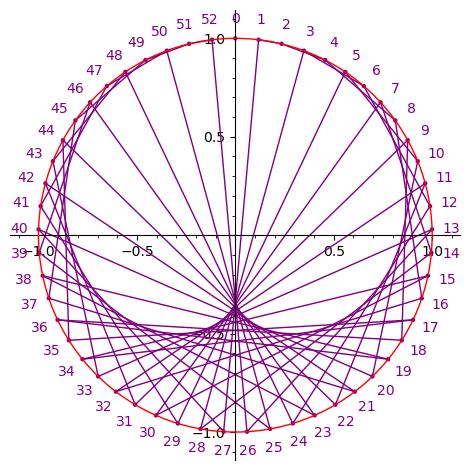

In [43]:
clock.show()

Now before we go further, a little tidyness.  You've created something you like (maybe), but it depended on various parameters, and to re-run and change things, you have to go back through the worksheet and re-run various cells.  Jupyter allows you to run cells out of order.  You can imagine this can become a mess pretty quickly.  So instead, let's build some compact tools out of the code you've created.  In one cell, write the following functions:  

- ``notch(k,m)`` -- gives the coordinates of notch k mod m
- ``clockface(m)`` -- creates a graphic object clock with notches modulo m and number labellings (uses ``notch``)
- ``segment(k,l,m,col)`` -- creates a graphic object line from notch k to notch l of colour ``col`` (uses ``notch``)
- ``multiplication(a,m)`` -- creates the full image of multiplication by a modulo m (using the functions above)
- ``addition(a,m)`` -- creates the full image of addition by a modulo m (should be easy now!)

In [44]:
def notch(k, m, r):  # call your function notch so we can refer to it later
    x = r*sin(k*2*pi/m)
    y = r*cos(k*2*pi/m)
    return (x,y)
def clockface(m):
    clock = Graphics()
    clock += circle( (0,0), 1, color="green" ) # center, radius, color
    for k in range(m):
        clock += point( notch(k, m, 1), color="purple")
        clock += text( k, notch(k, m, 1.1), color="purple")
    return clock
def segment(k,l,m,col):
    seg = line( [notch(k, m, 1), notch(l, m, 1)], color=col )
    return seg
def multiplication(a,m):
    clock = clockface(m)
    for k in range(m):
        clock += segment(k,a*k,m,"red")
    return clock
def addition(a,m):
    clock = clockface(m)
    for k in range(m):
        clock += segment(k,a+k,m,"red")
    return clock

Does it work?  Let's see!

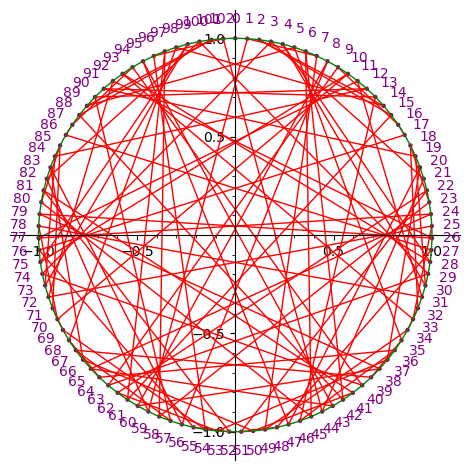

In [45]:
multiplication(7,103).show()

## Exploring quadratic residues

Consider the integers modulo $m$.  A _quadratic residue_ (QR) is a residue $a$ modulo $m$ which is a non-zero square.  Other non-zero residues are called _quadratic nonresidues_ (QNR).  Zero doesn't get a special name; it's badly behaved and is sitting in the corner missing out on the party game.  The legendre symbol for an integer $a$ and prime $p$ is defined as

$$ \left( \frac{a}{p} \right) = \left\{ \begin{array}{ll} 0 & a \equiv 0 \pmod p \\ 1 & a \text{ is a QR mod $p$} \\ -1 & a \text{ is a QNR mod $p$} \end{array} \right. $$

In [66]:
legendre_symbol(3,17)

-1

An opportunity to learn about lists!  Let's create the (ordered) list of legendre symbol values for the residues modulo $17$.  To create a list, you can type ``mylist = []``.  To add things to your list, you can type ``mylist.append(mything)``.  First, try filling out your list with a for loop.

In [56]:
mylist = []
for i in srange(17):
    mylist.append(legendre_symbol(i,17))
mylist

[0, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1]

You should get ``[0, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1]``.  But python loves lists, so there's a more compact 'pythonic' way to create the same list, called 'list comprehension'.  Check this out:

In [59]:
mylist = [ legendre_symbol(i,17) for i in srange(17) ]
mylist

[0, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1]

Ok that's just too much fun, sorry.  Use list comprehension to create a list of the values $f(k) = \sum_{j=1}^k \left( \frac{j}{17} \right)$ for $k$ from $0$ to $16$.  Wait, how do you add stuff up?  Use syntax on a list of values to add, like `sum([1,2,3])` (which gives 6).

In [78]:
[ sum([ legendre_symbol(j,17) for j in srange(1,k+1)]) for k in srange(17) ]

[0, 1, 2, 1, 2, 1, 0, -1, 0, 1, 0, -1, -2, -1, -2, -1, 0]

Sanity check:  you should get `[0, 1, 2, 1, 2, 1, 0, -1, 0, 1, 0, -1, -2, -1, -2, -1, 0]`.  Watch for indexing errors.

Now just for kicks, let's compare this to what we get if we use random values $1$ or $-1$ instead of legendre_symbols.  Python has a random value functionality `randint(a,b)` to return random integers between a and b (inclusive).  Adapt both of your list comprehensions above (the list of legendre-symbols and the list of partial sums).  Run it a few times to see random examples.

In [77]:
[ 1 - 2*randint(0,1) for j in srange(1,17) ]

[-1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1]

In [79]:
[ sum([ 1 - 2*randint(0,1) for j in srange(1,k+1)]) for k in srange(17) ]

[0, 1, 2, 1, 2, -3, 0, -5, -2, -1, 6, 5, 4, 3, -2, -5, 0]

Do legendre_symbols look random?  We would like to explore a little.

## Detour on Randomness

Real randomness is not repeatable.  Neither is the randomness in python actually random -- it is pseudorandom.  We can get repeatable pseudorandomness by using a `seed'.  Here's how python does this for you.

In [106]:
# some functionality needs to be loaded before use
import random 

# RNG = Random Number Generator
# we will seed with the answer to life the universe and everything -- should work out well
rng = random.Random(int(42)) # oh no, we get an error!  That's because 42 is a Sage integer not a Python integer.  Use `int(42)` instead.
rng

To demonstrate our new rng, try running the next cell several times:  what does it do each time?

In [107]:
# people sometimes use underscore for a throwaway variable (convention for readability)
[rng.randint(1,10) for _ in range(10)] # fyi: range puts out python integers and srange puts out sage integers

[2, 1, 5, 4, 4, 3, 2, 9, 2, 10]

By contrast, try running this cell repeatedly:  how is the behaviour different?

In [105]:
rng = random.Random(int(42))
[rng.randint(1,10) for _ in range(10)]

[2, 1, 5, 4, 4, 3, 2, 9, 2, 10]

What's happening is the "seed" is the "starting point" for the random-looking sequence of outputs.  Start at the same seed, and you'll always see the same sequence of pseudo-randomness.  Every time you call `randint` you get the next item of the pseudo-random sequence.

Ok, cool, now we have repeatable pseudorandomness.  What's going on under the hood?  Here's a simple pseudo-random number generator called Blum-Blum-Shub.  Try changing the seed and watching it run.  Read the code, i.e. figure out exactly what it is doing.

In [123]:
seed = 42
modulus = next_prime(100)*next_prime(200)
x = seed
results = []
for _ in range(20):
    x = Mod(x^2,modulus)
    results.append(Mod(x,2))
results

[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0]

It's not random at all, but it seems to behave quite randomly, statistically.  The study of pseudo-randomness is a deep subject.  We can use it for experiments, but keep in mind its pseudo-ness, because you may be on the edge of the known mathematical universe in your experiments.  Sometimes experiments turn up flaws in pseudo-random number generators.

In fact, here's a challenge.  Find a flaw (feature?) of Blum-Blum-Shub:  a fundamental way in which its behaviour differs from true randomness.

Now design your own pseudo-random number generator.  The goals are: (1) indistinguishability from true randomness (what should this mean?); (2) efficiency; (3) deterministic dependence on a seed value.

Python uses the [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister) pseudorandomness algorithm involving the Mersenne prime $2^{19937}-1$.

Shall we run some tests?

First, let's take the mean and standard deviation.   There's a python package called `numpy` which has useful numerical methods.  Here's how we might test the mean and standard deviation of some random data.

In [175]:
import numpy as np # people usually write "as np" to say we'll call our copy of numpy by that name

data = [1, 1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1]

print("mean:", np.mean(data))
print("standard deviation:", np.std(data))

mean: 0.125
standard deviation: 0.9921567416492215


There's a useful python package called `scipy` that is available in Sage.  It has various scientific computing methods.  In particular, it can do a chi-squared test.

In [184]:
from scipy import stats

# we count the data into two bins (this automatically ranges the bins [-1,0) and [0,1], i.e -1 vs. 1)
counts, _ = np.histogram(data, bins=2) # histogram produces two outputs, we only care about first
print( "Our counts :", counts )

# this is the chisquare test
chi2, p = stats.chisquare(counts)
print("Chi2:", chi2, "p:", p)

Our counts : [7 9]
Chi2: 0.25 p: 0.6170750774519739


What does the [chi-square test](https://en.wikipedia.org/wiki/Chi-squared_test) do?  It checks if our data are distributed into the bins as expected.  Let $m_i$ be the expected number of data points in the $i$-th bin.  Let $x_i$ be the actual number of data points in the $i$-th bin.  Suppose we have $k$ data points.  Then
$$ X^2 = \sum_{i=1}^k  \frac{ (x_i - m_i)^2 }{m_i} $$
This variable $X^2$ should follow a chi-squared distribution if the data is distributed as expected.  

We then run a [$p$-test](https://en.wikipedia.org/wiki/P-value), i.e. significance test.  This computes the probability, under the null hypothesis (the expected distribution, here, uniform), that the data produce a statistic at least as far from expected as that observed.  A small p value means that the result observed is unlikely under the null hypothesis.  You start getting nervous when $p < 0.05$ which means what you observed would only happen in 1 out of 20 experiments on null hypothesis (truly random) data.

How do you feel about the data above?

## Back to Quadratic Residues

To create a model of the behaviour of legendre symbols, let's create a "fake legendre symbol" that is pseudo-random.  Your function should do the following:

1. accept valid inputs (k,m) that are accepted by `legendre_symbol` (can assume m is prime)
2. return 0 if k is 0 modulo m
3. otherwise return -1 or 1
4. the return value should depend only on k modulo m (so (1,5) and (6,5) return the same)
5. otherwise return a deterministic (always the same for the same input k,m) but pseudorandom value in {-1,1}.

You don't need to do error handling right now, but recall that `legendre_symbol` returns an error if m is not prime.  We'll stick to m prime, so you can do whatever you want if m is not prime (e.g. print an error or just return `False`).

In [159]:
def fake_legendre(k,m): # k is top, m is bottom (modulus)
    if m.is_prime() == false: return False
    if Mod(k,m) == 0: return 0
    rng = random.Random(int(k*10^10+m)) # avoid collisions in seeds (at least somewhat)
    return 1 - 2*rng.randint(0,1)

# to completely avoid collisions in seeds
# m is prime, so it is positive
def fake_legendre(k,m): # k is top, m is bottom (modulus)
    if m.is_prime() == false: return False
    k = Mod(k,m)
    if k == 0: return 0
    # avoid collisions in seeds by cantor https://www.sciencedirect.com/science/article/pii/0022314X78900355?via%3Dihub
    cantor = k + (k+m-1)*(k-m-2)/2
    rng = random.Random(int(cantor)) 
    return 1 - 2*rng.randint(0,1)

Here's a cell to mess around and make sure your function works as intended.

In [158]:
m = next_prime(10)
[fake_legendre(i,m) for i in range(2*m)]

[0, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 0, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1]

Ok, your turn.  Please use mean, standard deviation and chi-squared to investigate and compare your fake legendre symbol and the real legendre symbol.  Do you see any robust differences in their behaviour?  If you think you have something interesting, run more tests to demonstrate as robust an effect as you can.  You may want to look up and try something called the "[runs test](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35d.htm)" of randomness.  We will compare our results next time.

In [240]:
def runstest(data): # assumes data is +1, -1 and at least one of each
    # count runs
    runs = 1
    for i in range(1, len(data)):
        if data[i] != data[i-1]:
            runs += 1

    # count the number of +1 and -1
    plus, minus = data.count(1), data.count(-1)
    total = plus + minus
    expectedruns = 1 + 2*plus*minus/total # runs distribution mean
    expectedvariance = 2*plus*minus*(2*plus*minus - total)/(total^2*(total-1))
    # this is the runs test z statistics
    z = (runs - expectedruns)/sqrt(expectedvariance) if expectedvariance > 0 else 0.0

    # p-value from normal approximation
    from mpmath import erfc
    p = RR(erfc(abs(z)/sqrt(2))) # cast to sage real number
    return runs, z, p

def chi(data):
    counts, _ = np.histogram(data, bins=2) 
    return stats.chisquare(counts)

def checkstats(func, modulus, verbose=True): # this is a default value for an optional argument verbose
    # there's a symmetry to legendre symbols, so we look only at the first half!
    data = [ func(k,modulus) for k in range(1,floor(modulus/2)) ]
    if verbose: print(data)
    mean = np.mean(data)
    std = np.std(data)
    var = np.var(data)
    if verbose: print("mean:", mean)
    if verbose: print("standard deviation:", std)
    if verbose: print("variance:", var)
    chi2, pchi = chi(data)
    if verbose: print("Chi2:", chi2, "p:", pchi)
    runs, z, prun = runstest(data) # z-statistic and p-alue
    zn = z.n() # the .n() means give numerical approximation not symbolic
    if verbose: print("Runs:", runs, "z-statistic:", zn , "p:", prun) 
    return [mean,std,var,chi2,pchi,runs,zn,prun]

In [273]:
checkstats(fake_legendre, next_prime(390))

[1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1]
mean: -0.025380710659898477
standard deviation: 0.9996778578754252
variance: 0.9993558195263987
Chi2: 0.12690355329949238 p: 0.7216643955600961
Runs: 102 z-statistic: 0.366449433230152 p: 0.714029738681465


[-0.025380710659898477,
 0.9996778578754252,
 0.9993558195263987,
 0.12690355329949238,
 0.7216643955600961,
 102,
 0.366449433230152,
 0.714029738681465]

In [271]:
checkstats(legendre_symbol, next_prime(300))

[1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1, -1, -1]
mean: 0.05263157894736842
standard deviation: 0.9986139979479092
variance: 0.9972299168975068
Chi2: 0.42105263157894735 p: 0.5164122683960384
Runs: 76 z-statistic: -0.128855051155568 p: 0.897472344052096


[0.05263157894736842,
 0.9986139979479092,
 0.9972299168975068,
 0.42105263157894735,
 0.5164122683960384,
 76,
 -0.128855051155568,
 0.897472344052096]

In [248]:
primes = [nth_prime(i) for i in range(1000, 1100)]
datafake = [checkstats(fake_legendre, p, verbose=False) for p in primes]
dataleg  = [checkstats(legendre_symbol, p, verbose=False) for p in primes]

In [264]:
def plot(ind):  # [mean,std,var,chi2,pchi,runs,zn,prun]
    plot = Graphics()
    dataplot = [datafake[datapt][ind] for datapt in range(len(datafake))]
    plot += list_plot( dataplot, color="red" )
    dataplot = [dataleg[datapt][ind] for datapt in range(len(dataleg))]
    plot += list_plot( dataplot, color="blue" )
    return plot

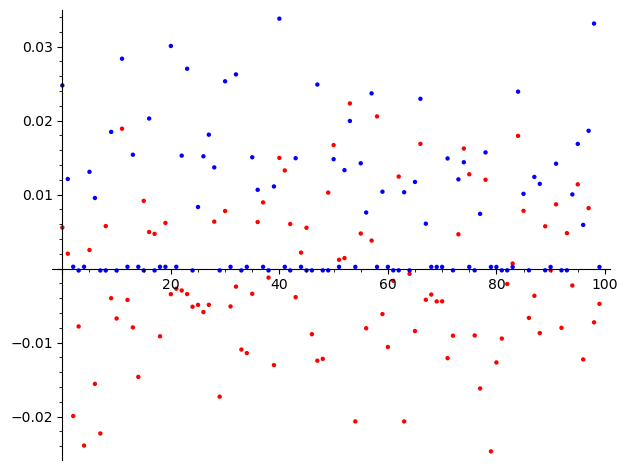

In [265]:
plot(0) # mean

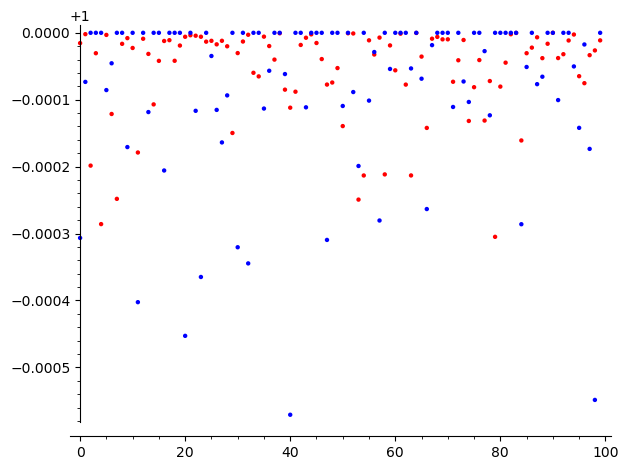

In [266]:
plot(1) # std

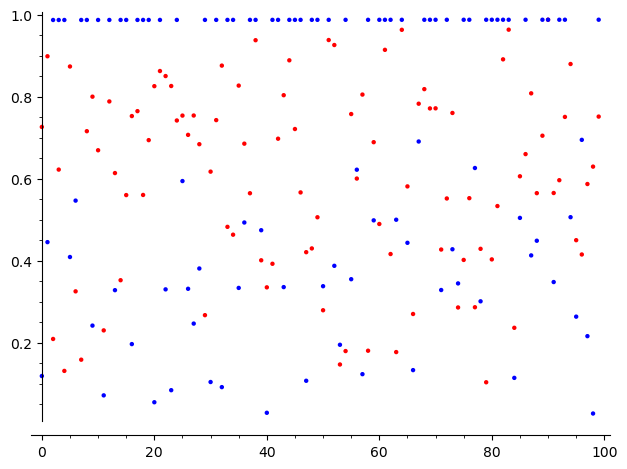

In [267]:
plot(4) # chi-p

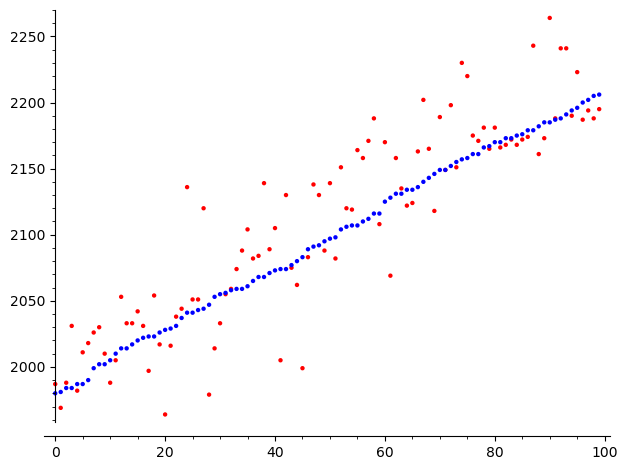

In [268]:
plot(5) # runs

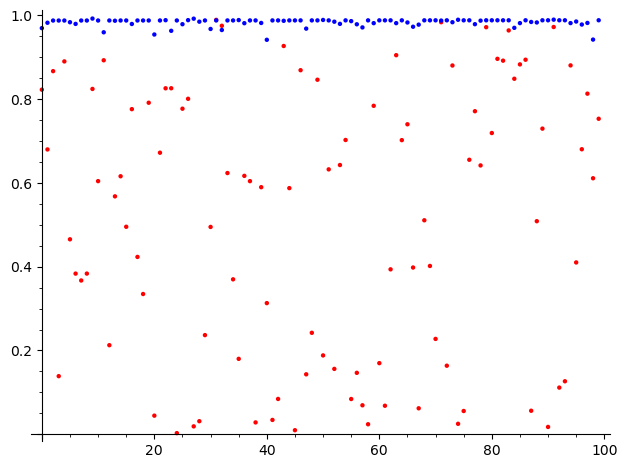

In [269]:
plot(7) # p-runs

Some resources I was able to find:

1. [mathoverflow on bias in runs](https://mathoverflow.net/questions/437309/a-bias-for-runs-in-legendre-symbols)
2. [paper on using legendre sequences in signal processing](https://www.researchgate.net/publication/290810299_FPGA_Implementation_of_Pseudo_Noise_Sequences_based_on_Quadratic_Residue_Theory) - engineering paper
   